<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This notebook is designed to provide hands-on experience and foundational knowledge in machine learning. It is part of our journey to explore key ML concepts, algorithms, and applications. Whether you're a PhD student, or a master's student, this repository aims to support your learning goals and encourage critical thinking about machine learning systems.


# **Week 01: Introduction to Machine Learning and Class Mechanics**

## 1. Introduction
Machine Learning (ML) is a subset of artificial intelligence that enables computers to learn from data without explicitly being programmed. ML is everywhere—powering applications like:
- Spam email detection
- Netflix recommendations
- Fraud detection in financial transactions
- Autonomous vehicles

In this session, we will cover:
1. The three main types of ML: Supervised, Unsupervised, and Semi-supervised Learning.
2. Generative vs. Discriminative models.
3. The basic workflow of ML projects.
4. Hands-on: Loading and exploring a dataset using Python.

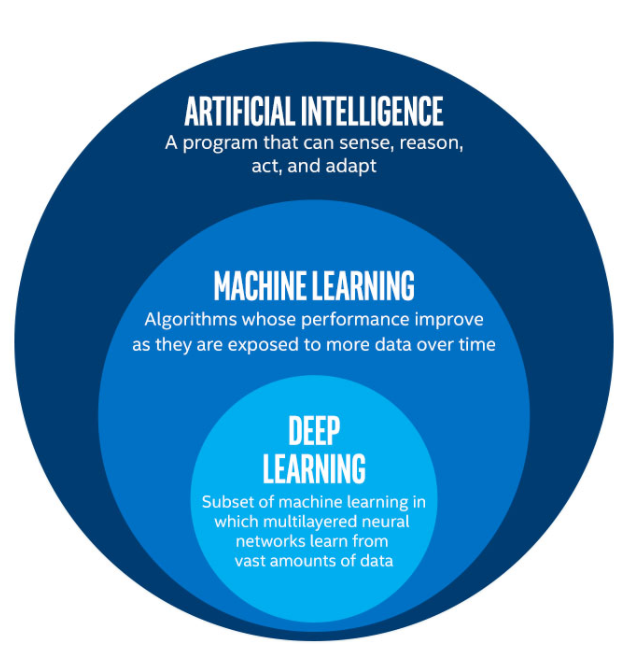

Ref: https://mylearningsinaiml.wordpress.com/what-is-dl/

## 2. Types of Machine Learning
### Supervised Learning
- The model learns from labeled data (input-output pairs).
- **Examples:**
  - Predicting house prices (Regression).
  - Classifying emails as spam or not (Classification).

### What is Supervised Learning?
Supervised learning is a core paradigm in machine learning, where the model is trained on a labeled dataset. Each training example consists of an input-output pair where:

- Input (𝑋): A set of features (vectors) representing the data.
- Output (𝑌): Corresponding target values (labels), which can be categorical (classification) or continuous (regression).

The objective of supervised learning is to approximate a mapping function
𝑓: 𝑋→𝑌 such that the model generalizes well to unseen data.

### Key Characteristics
1. **Training Data**: Requires labeled datasets where input-output pairs are known.
2. **Loss Function**: Measures the error between the predicted and actual outputs.
   - **Examples**:
     - Mean Squared Error (MSE) for regression.
     - Cross-Entropy Loss for classification.
3. **Optimization**: Techniques like Stochastic Gradient Descent (SGD) are used to minimize the loss function.
4. **Evaluation Metrics**:
   - **Classification**: Accuracy, Precision, Recall, F1-score, ROC-AUC.
   - **Regression**: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), \(R^2\).



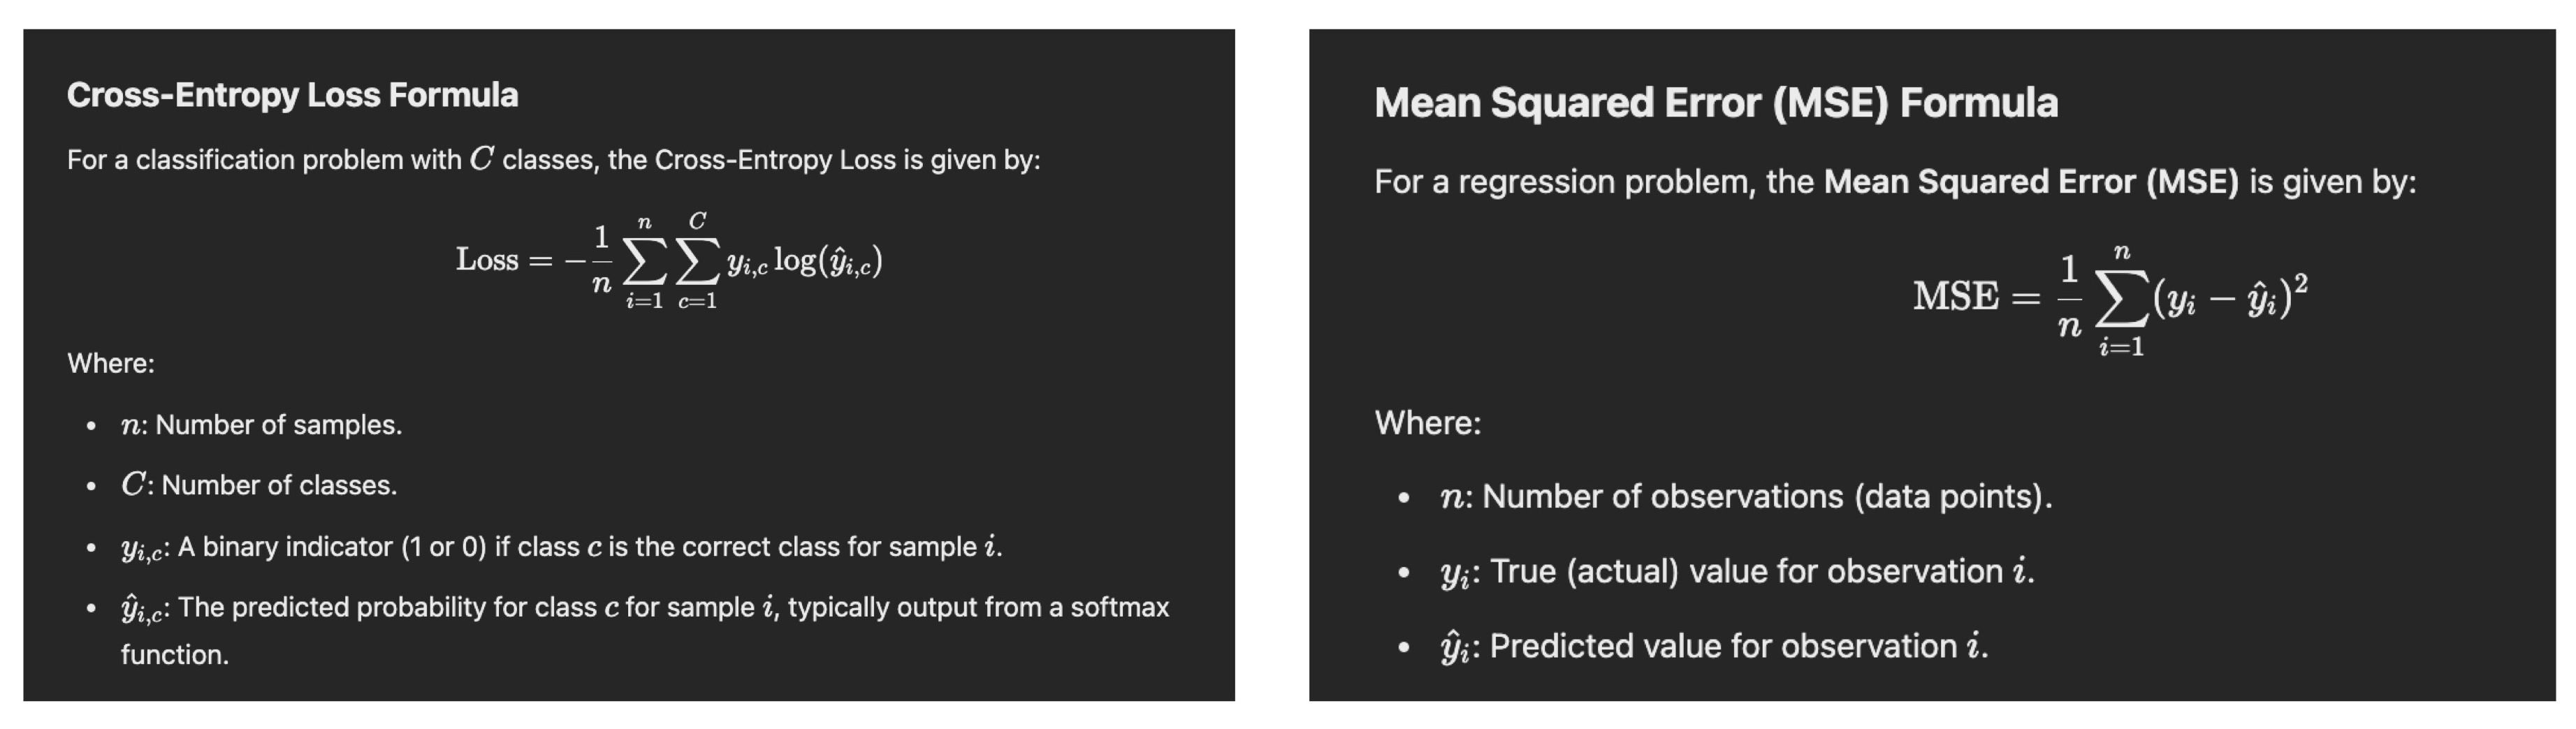

### Examples of Supervised Learning

#### 1. Regression Example: Predicting House Prices

#### **Description**
In a housing dataset:
- **Input \(X\)**: Features such as number of bedrooms, size in square feet, and location.
- **Output \(Y\)**: Price of the house.

Mean Squared Error: 163424.88
R^2 Score: 0.99


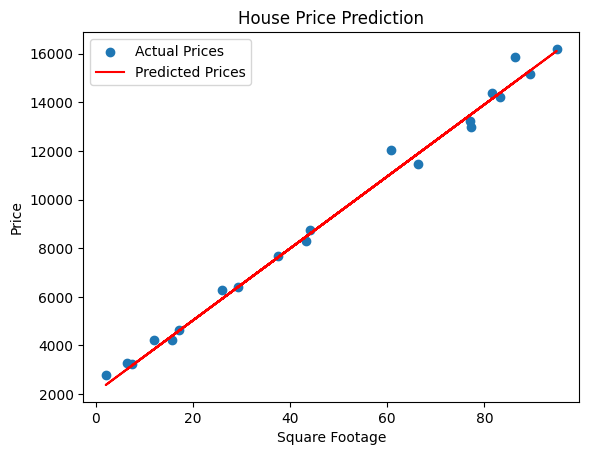

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling and manipulating datasets
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For performing linear regression
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance (MSE and R²)
import matplotlib.pyplot as plt  # For visualizing data and model results


# Generate synthetic data
np.random.seed(42)  # Set a random seed for reproducibility
num_samples = 100  # Number of data points to generate
X = np.random.rand(num_samples, 1) * 100  # Generate random square footage values (feature)
y = 2000 + 150 * X + np.random.randn(num_samples, 1) * 500  # Generate corresponding house prices (target) with some noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot the results
plt.scatter(X_test, y_test, label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()

In the equation 𝑦 = 2000 + 150 × 𝑋 + np.random.randn() × 500, each number has a specific meaning in modeling house prices. The 2000 represents the intercept, meaning the base price of a house when the square footage is zero. The 150 is the coefficient (slope), indicating that for every additional square foot, the price increases by 150 units. The 500 is the noise scale, which multiplies a random value from a normal distribution to add variability, simulating real-world price fluctuations. Together, these elements create a realistic dataset where house prices are primarily determined by square footage but also influenced by market randomness.

The model's Mean Squared Error (MSE) represents the average squared difference between the predicted and actual house prices. Given the scale of the house prices in the dataset (generated with a base price of 2,000 and scaled by square footage with added noise), this value indicates a reasonable level of prediction accuracy, as smaller MSE values signify closer predictions to actual values.

Additionally, the model's 𝑅^2 score of 0.99 demonstrates that 99% of the variance in house prices is explained by the linear regression model, indicating an excellent fit to the data. The high 𝑅^2 and relatively low MSE suggest the model performs well in capturing the underlying linear relationship between square footage and house prices, with only minor errors due to noise in the synthetic data.

#### 2. Classification Example: Spam Detection
Description

In an email dataset:

- Input (𝑋): Text of the email (processed into numerical features).
- Output (𝑌): Binary labels (Spam or Not Spam).

In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer  # Converts text data into a bag-of-words representation
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier for text classification
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance (accuracy and detailed metrics)


# Example expanded dataset
emails = [
    "Free money now!!!", "Meeting at 10 AM tomorrow",
    "Congratulations! You won a prize!", "Can you review the report?",
    "Get a loan with no credit check!", "Team lunch scheduled for Friday",
    "Claim your free gift card now!", "Project deadline extended to next Monday",
    "Win a free vacation by entering now!", "Please find the meeting minutes attached.",
    "Discount offers just for you!", "Let’s schedule a 1:1 session tomorrow."
]

labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1: Spam, 0: Not Spam

# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=42, stratify=labels)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"]))


Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

    Not Spam       1.00      0.33      0.50         3
        Spam       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



## Model Evaluation Insights

### Accuracy
- **Overall Accuracy**: 0.67 (67% of predictions are correct).
  - This means the model correctly classified 4 out of 6 emails.
  - While this seems reasonable for such a small dataset, we need to dig deeper into the performance across classes.

### Classification Report Metrics
The classification report provides more nuanced metrics for the two classes: **"Not Spam" (0)** and **"Spam" (1)**. Let's break it down:

#### **Not Spam (Class 0)**
- **Precision (1.00)**: When the model predicts "Not Spam," it is always correct (no false positives).
- **Recall (0.33)**: The model only identifies 33% of the actual "Not Spam" emails. This suggests the model is biased toward predicting "Spam."
- **F1-Score (0.50)**: The harmonic mean of precision and recall is 0.50, indicating moderate performance for this class.

#### **Spam (Class 1)**
- **Precision (0.60)**: When the model predicts "Spam," it is correct 60% of the time (some false positives exist).
- **Recall (1.00)**: The model identifies all the actual "Spam" emails (no false negatives).
- **F1-Score (0.75)**: The F1-score is higher for "Spam" than "Not Spam," indicating the model performs better for this class.

### Macro Average
- **Precision (0.80)**: The average precision across both classes.
- **Recall (0.67)**: The average recall across both classes.
- **F1-Score (0.62)**: Indicates the model's overall balance between precision and recall.


### Weighted Average
- These metrics take class imbalance into account (e.g., if one class has more samples than the other).
- Since the dataset is balanced (6 samples, evenly split between "Spam" and "Not Spam"), the weighted and macro averages are similar.

### **Key Observations**

#### **Bias Toward "Spam"**
- The model is biased toward predicting "Spam." It correctly predicts all "Spam" emails (**recall = 1.00**) but struggles with "Not Spam" (**recall = 0.33**).
- This bias may be due to the model's assumption of feature independence or the small dataset size, which can exaggerate certain patterns in the training data.

#### **Small Dataset**
- With only 6 test samples, the results may not generalize well to larger datasets.
- The small number of samples also makes metrics like precision and recall highly sensitive to small changes in predictions.

#### **Class Imbalance in Predictions**
- The model predicted more "Spam" emails than "Not Spam," resulting in poor recall for "Not Spam."
- This issue can be addressed with:
  - Better feature engineering.
  - Hyperparameter tuning.
  - Using more advanced models.


### Unsupervised Learning
- The model identifies patterns in unlabeled data.
- **Examples:**
  - Grouping customers by purchasing habits (Clustering).
  - Reducing data dimensions for visualization (Dimensionality Reduction).

## Unsupervised Learning

### What is Unsupervised Learning?
Unsupervised learning is a type of machine learning where the model works with unlabeled data. Unlike supervised learning, the algorithm is not provided with explicit input-output pairs but instead must discover patterns, structures, or relationships in the data.

The primary goal of unsupervised learning is to understand the underlying structure of the data, group similar data points, and reduce complexity where needed.

### Key Characteristics
1. **No Labels**:
   - The dataset lacks predefined labels or target values.
   - The model explores the data's intrinsic patterns without guidance.

2. **Applications**:
   - **Clustering**: Grouping data into similar clusters based on their features.
   - **Dimensionality Reduction**: Simplifying datasets while retaining the most important information.

3. **Evaluation**:
   - Unsupervised learning often lacks ground truth for evaluation.
   - Metrics like **silhouette score** (for clustering) and **explained variance** (for dimensionality reduction) are commonly used.





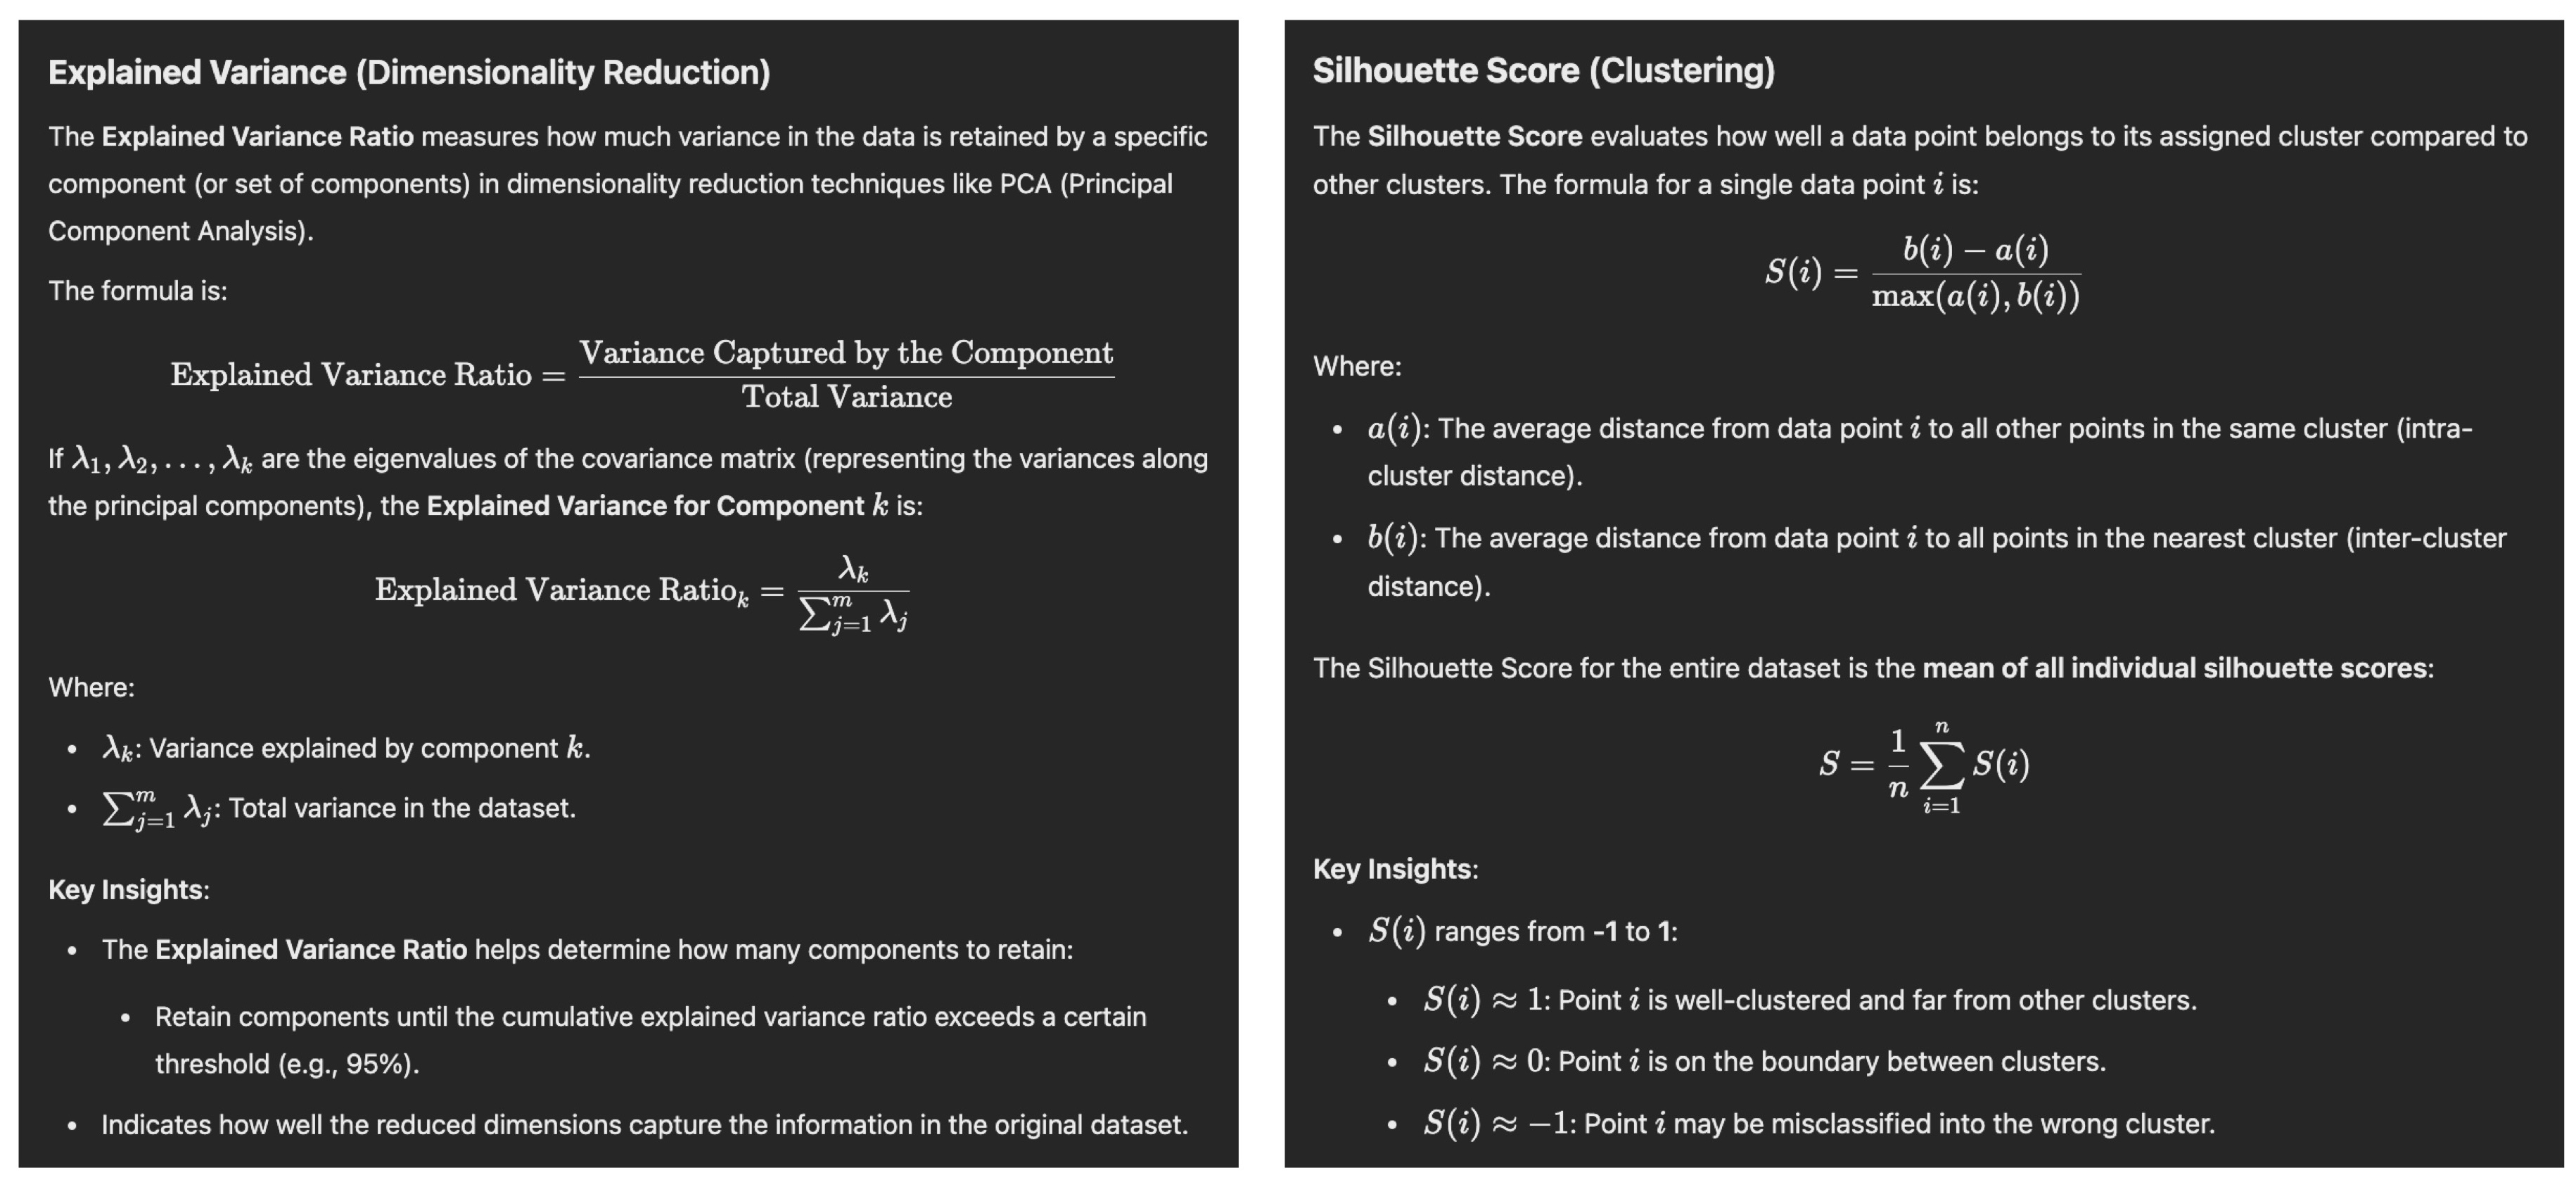

### Examples of Unsupervised Learning

#### 1. Clustering: Grouping Customers by Purchasing Habits

#### **Description**
In customer segmentation, clustering is used to identify groups of customers with similar purchasing habits. This helps businesses tailor their marketing strategies.

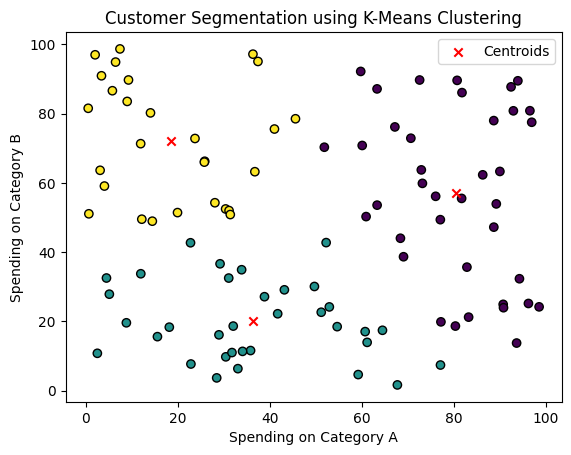

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans  # For performing K-Means clustering
import numpy as np  # For generating and manipulating numerical data
import matplotlib.pyplot as plt  # For visualizing the clustering results

# Generate synthetic data (customer spending on different categories)
np.random.seed(42)  # Set a random seed for reproducibility
data = np.random.rand(100, 2) * 100  # Create 100 samples, each with spending values for 2 categories (scaled to [0, 100])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Initialize K-Means with 3 clusters and a fixed random seed
kmeans.fit(data)  # Perform clustering on the data
labels = kmeans.labels_  # Get the cluster labels for each data point

# Plot the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')  # Plot data points with colors based on cluster labels
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', label='Centroids')  # Mark cluster centroids in red
plt.xlabel('Spending on Category A')  # Label for x-axis
plt.ylabel('Spending on Category B')  # Label for y-axis
plt.title('Customer Segmentation using K-Means Clustering')  # Add a title to the plot
plt.legend()  # Show legend to differentiate data points and centroids
plt.show()  # Display the plot


* The underscore at the end of kmeans.labels_ in scikit-learn indicates that labels_ is an attribute generated by the KMeans object after fitting the model.

**Clustering Techniques**

1. K-Means: Partitions data into 𝑘 clusters by minimizing the variance within clusters. Works well with spherical clusters but struggles with complex shapes.
- Spherical Clusters: Compact, circular (or spherical in higher dimensions) clusters with roughly equal radius.


2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Groups points closely packed together while marking outliers as noise. Suitable for non-spherical clusters and datasets with noise.
- Non-Spherical Clusters: Irregularly shaped clusters, such as elongated, oval, or arbitrary shapes.

3. Hierarchical Clustering: Builds a tree-like structure of clusters.
Can be agglomerative (bottom-up) or divisive (top-down).
- Agglomerative (Bottom-Up): Starts with each data point as its own cluster and iteratively merges the closest clusters until a single cluster or desired number of clusters is formed.
- Divisive (Top-Down): Starts with all data points in one cluster and recursively splits clusters into smaller ones until each data point is its own cluster or the desired number of clusters is reached.

**Dimensionality Reduction Techniques**

1. PCA (Principal Component Analysis): Projects data onto a lower-dimensional space by maximizing variance. Linear technique, limited to capturing linear relationships.

2. t-SNE (t-Distributed Stochastic Neighbor Embedding): Visualizes high-dimensional data in 2D or 3D. Captures non-linear structures effectively but is computationally intensive.

3. Autoencoders: Neural networks that learn compressed representations of data. Effective for complex non-linear dimensionality reduction.

**Dimensionality Reduction: Visualizing High-Dimensional Data**

Dimensionality reduction techniques like Principal Component Analysis (PCA) are used to project high-dimensional data onto lower dimensions, making it easier to visualize while preserving key information.

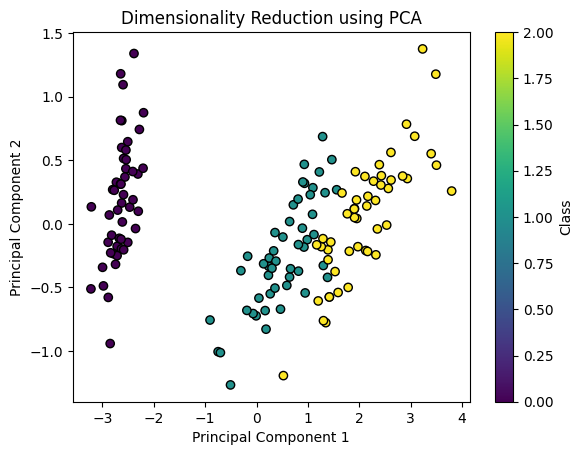

In [ ]:
# Import necessary libraries
from sklearn.decomposition import PCA  # For performing Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.datasets import load_iris  # To load the Iris dataset (a classic dataset for classification problems)
import matplotlib.pyplot as plt  # For visualizing the PCA-transformed data

# Load the Iris dataset (4 features, 3 classes)
data = load_iris()  # Load the dataset, which contains features and class labels
X = data.data  # Extract the features (4 dimensions: sepal length, sepal width, petal length, petal width)
y = data.target  # Extract the class labels (3 flower species: setosa, versicolor, virginica)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)  # Initialize PCA to reduce the feature dimensions from 4 to 2
X_pca = pca.fit_transform(X)  # Fit PCA on the dataset and transform it into 2 dimensions

# Visualize the data in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')  # Scatter plot of the transformed data; color by class
plt.xlabel('Principal Component 1')  # Label for the x-axis
plt.ylabel('Principal Component 2')  # Label for the y-axis
plt.title('Dimensionality Reduction using PCA')  # Add a title to the plot
plt.colorbar(label='Class')  # Add a color bar to indicate which color corresponds to which class
plt.show()  # Display the plot


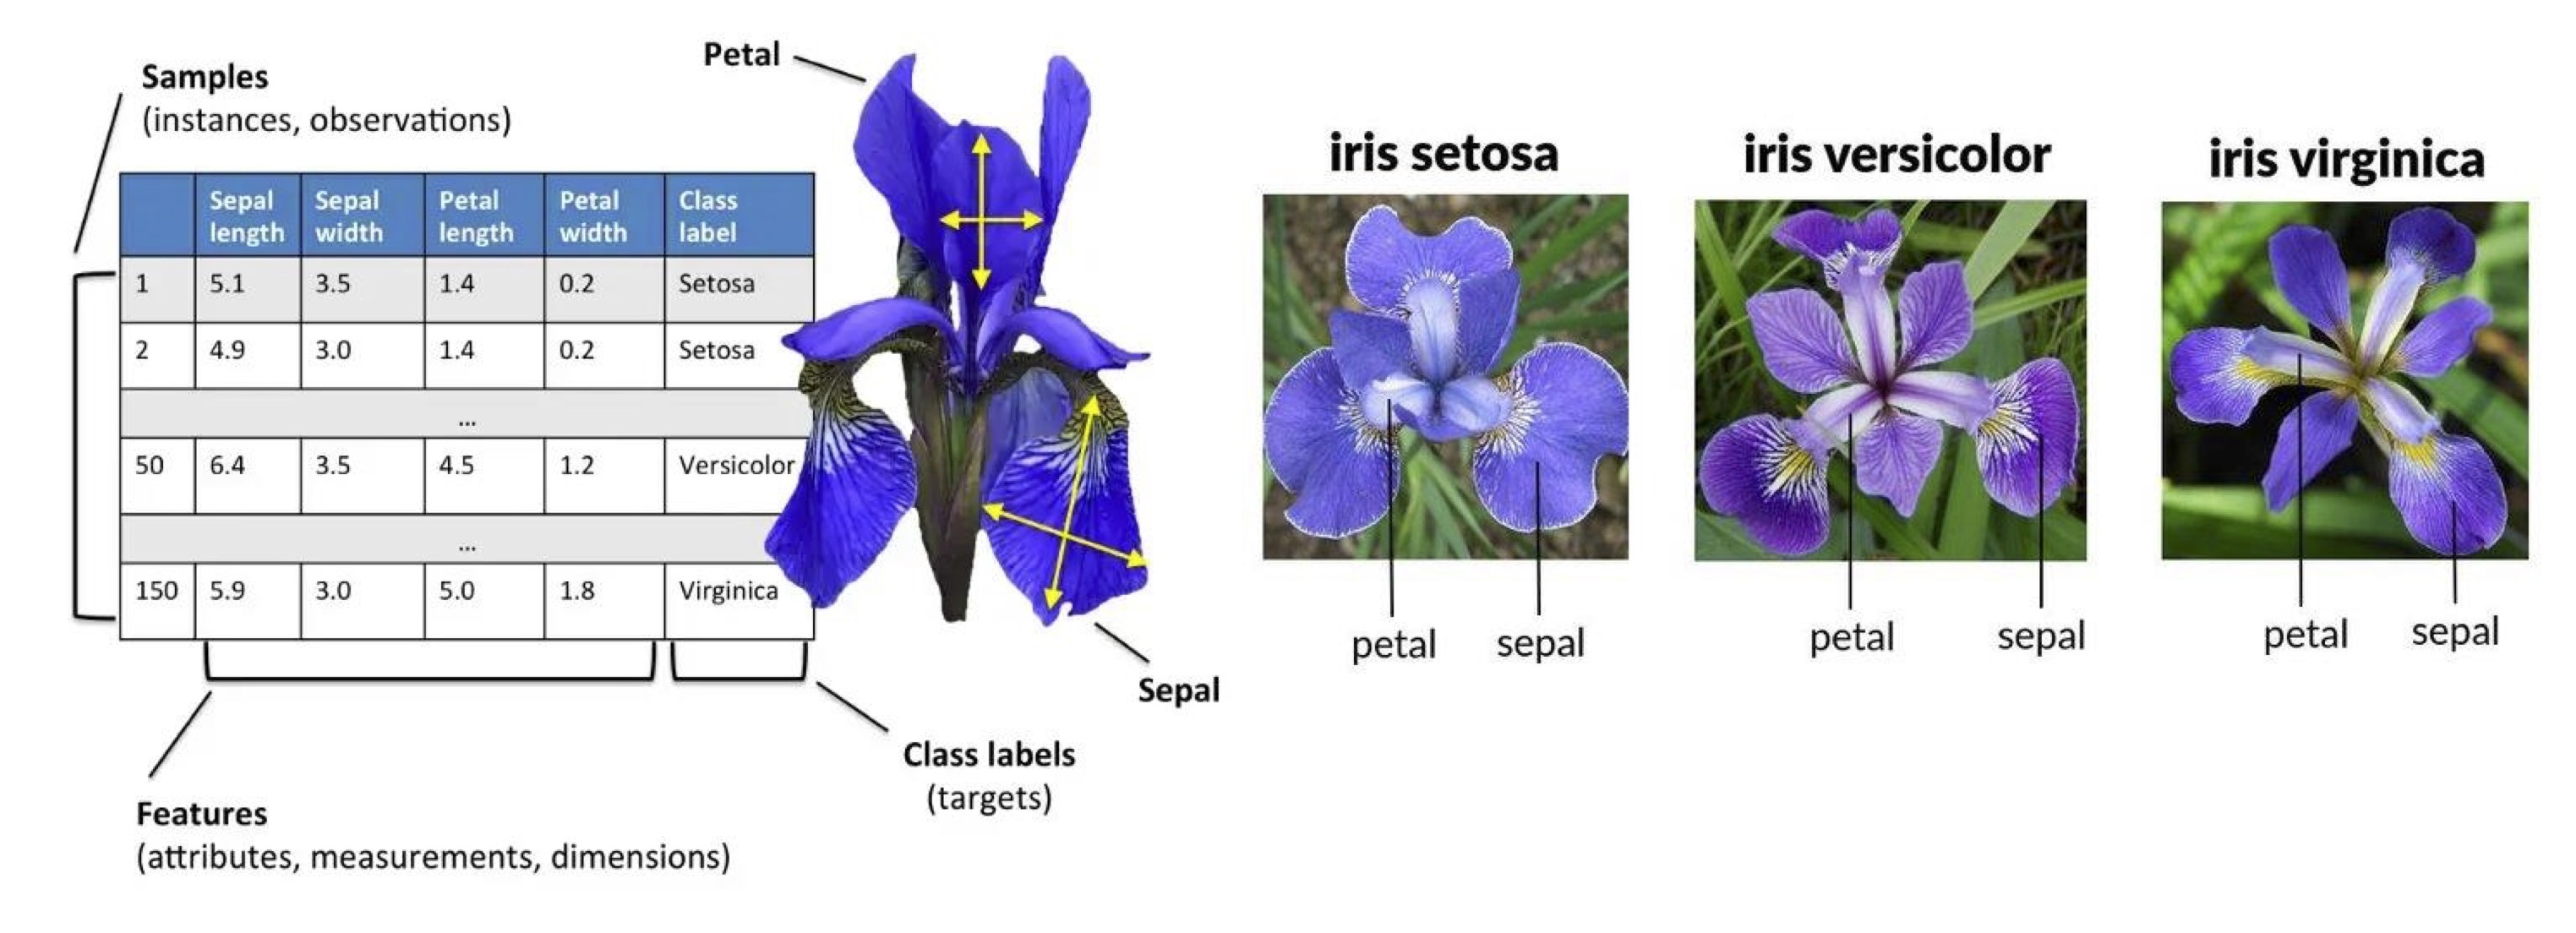

Ref: https://eminebozkus.medium.com/exploring-the-iris-flower-dataset-4e000bcc266c

**Applications**

Clustering:
- Customer segmentation.
- Document categorization.
- Image grouping.

Dimensionality Reduction:
- Data visualization.
- Preprocessing for supervised learning to reduce overfitting.
- Noise reduction in datasets.

### **Semi-supervised Learning**
- Combines a small amount of labeled data with a large amount of unlabeled data.
- **Example:** Labeling only a few medical images and using them to classify a larger dataset.

# Semi-supervised Learning

## What is Semi-supervised Learning?
Semi-supervised learning is a hybrid approach that combines the strengths of both supervised and unsupervised learning. It leverages a small amount of labeled data alongside a large amount of unlabeled data to improve learning performance.

The central idea is that labeled data can guide the learning process, while the unlabeled data helps capture the broader structure of the dataset. This approach is particularly useful in scenarios where obtaining labeled data is expensive, time-consuming, or requires expert annotation (e.g., labeling medical images).

## Key Characteristics
1. **Small Labeled Dataset**:
   - The model uses labeled data to learn the mapping between input features and output labels.

2. **Large Unlabeled Dataset**:
   - Unlabeled data provides additional structure, enabling the model to generalize better.

3. **Applications**:
   - Medical imaging (labeling only a few images to classify many).
   - Text classification (e.g., using a few labeled documents and a large corpus of unlabeled text).
   - Speech recognition (few annotated recordings with a large corpus of unannotated audio).

4. **Evaluation**:
   - Semi-supervised learning models are evaluated using the labeled portion of the dataset, similar to supervised learning.

## Example: Medical Image Classification

In this example, a small labeled dataset of X-ray images is used to classify a larger, unlabeled dataset of similar images.



Accuracy: 0.00


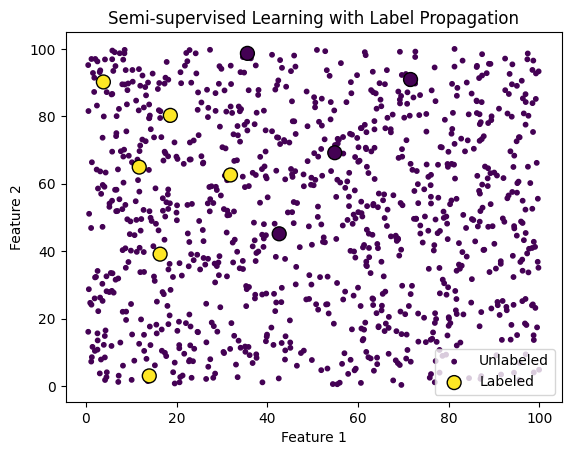

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical computations and dataset creation
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.semi_supervised import LabelPropagation  # For applying the Label Propagation algorithm (semi-supervised learning)
from sklearn.metrics import accuracy_score  # For evaluating the model's accuracy
import matplotlib.pyplot as plt  # For visualizing the data and results

# Generate synthetic dataset
np.random.seed(42)  # Set a random seed for reproducibility
num_samples = 1000  # Total number of samples to generate
X = np.random.rand(num_samples, 2) * 100  # Create random feature data (e.g., 2D points scaled to [0, 100])
y = np.full(num_samples, -1)  # Initialize all labels as -1 to represent unlabeled data

# Add a few labeled samples
labeled_indices = np.random.choice(num_samples, 10, replace=False)  # Randomly select 10 samples to label
y[labeled_indices] = np.random.choice([0, 1], size=10)  # Assign random binary labels (0 or 1) to these selected samples

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data into training and testing sets (80/20 split)

# Apply Label Propagation (semi-supervised learning)
model = LabelPropagation()  # Initialize the Label Propagation model
model.fit(X_train, y_train)  # Train the model using the labeled and unlabeled data in the training set

# Predict on the test set (excluding unlabeled data)
y_pred = model.predict(X_test[y_test != -1])  # Predict labels only for the test samples that are labeled
y_test_filtered = y_test[y_test != -1]  # Filter out unlabeled test samples for comparison

# Evaluate the model
accuracy = accuracy_score(y_test_filtered, y_pred)  # Calculate the accuracy of the predictions
print(f"Accuracy: {accuracy:.2f}")  # Print the accuracy in a human-readable format

# Visualize the labeled and unlabeled data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10, label='Unlabeled')  # Plot all data points, with unlabeled points in a lighter color
plt.scatter(X[labeled_indices, 0], X[labeled_indices, 1], c=y[labeled_indices], cmap='viridis', s=100, edgecolor='k', label='Labeled')  # Highlight labeled samples
plt.xlabel('Feature 1')  # Label for x-axis
plt.ylabel('Feature 2')  # Label for y-axis
plt.title('Semi-supervised Learning with Label Propagation')  # Add a title to the plot
plt.legend()  # Add a legend to distinguish labeled and unlabeled points
plt.show()  # Display the plot


Key Changes:
- Increased Labeled Samples: Changed from 10 to 50 labeled samples, which provides the model with more information.
- Balanced Classes: Ensured that half of the labeled samples are from class "0" and half are from class "1".
- Tuned Kernel Parameters: Set kernel='rbf' and tuned gamma=20, which controls how far the influence of a labeled point reaches in the feature space.


Accuracy: 0.29


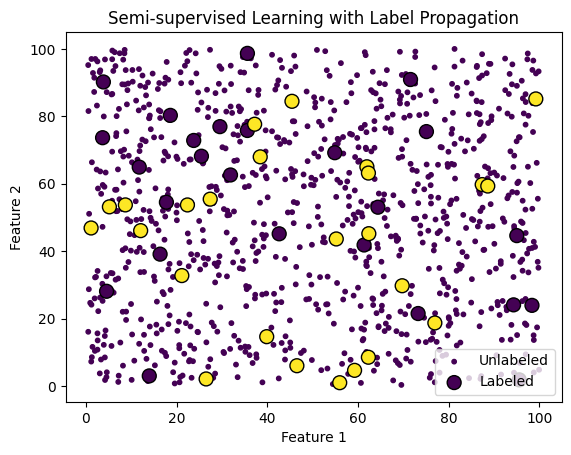

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)  # Set a random seed for reproducibility
num_samples = 1000  # Total number of samples
X = np.random.rand(num_samples, 2) * 100  # Generate 2D feature data scaled to [0, 100]
y = np.full(num_samples, -1)  # Initialize all labels as unlabeled (-1)

# Add more labeled samples with balanced classes
num_labeled = 50  # Increase the number of labeled samples
labeled_indices = np.random.choice(num_samples, num_labeled, replace=False)  # Select `num_labeled` samples
y[labeled_indices[: num_labeled // 2]] = 0  # Assign the first half to class 0
y[labeled_indices[num_labeled // 2 :]] = 1  # Assign the second half to class 1

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Label Propagation (semi-supervised learning)
model = LabelPropagation(kernel='rbf', gamma=20)  # Use an RBF kernel with gamma tuned for better performance
model.fit(X_train, y_train)  # Train the model with the labeled and unlabeled data

# Predict on the test set (excluding unlabeled data)
y_pred = model.predict(X_test[y_test != -1])  # Predict only for labeled test samples
y_test_filtered = y_test[y_test != -1]  # Filter out unlabeled test samples for evaluation

# Evaluate the model
accuracy = accuracy_score(y_test_filtered, y_pred)  # Compute accuracy
print(f"Accuracy: {accuracy:.2f}")  # Print accuracy score

# Visualize the labeled and unlabeled data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10, label='Unlabeled')  # Plot all data
plt.scatter(X[labeled_indices, 0], X[labeled_indices, 1], c=y[labeled_indices], cmap='viridis',
            s=100, edgecolor='k', label='Labeled')  # Highlight labeled data points
plt.xlabel('Feature 1')  # Label for x-axis
plt.ylabel('Feature 2')  # Label for y-axis
plt.title('Semi-supervised Learning with Label Propagation')  # Plot title
plt.legend()  # Add legend
plt.show()  # Show the plot


Key Adjustments:

- Improved Dataset Structure: Created clusters for each class to make the classes more separable in feature space. This adjustment makes it easier for the LabelPropagation model to propagate labels correctly.

- Increased Labeled Samples: Increased the number of labeled samples to 100 (evenly distributed between the two classes).

- Normalized Features: Normalized the dataset to range [0, 1] using MinMaxScaler, improving the performance of the RBF kernel.

- Tuned Gamma: Increased gamma to 50 for the RBF kernel, focusing the influence of labeled points within a closer radius.

Accuracy: 0.71


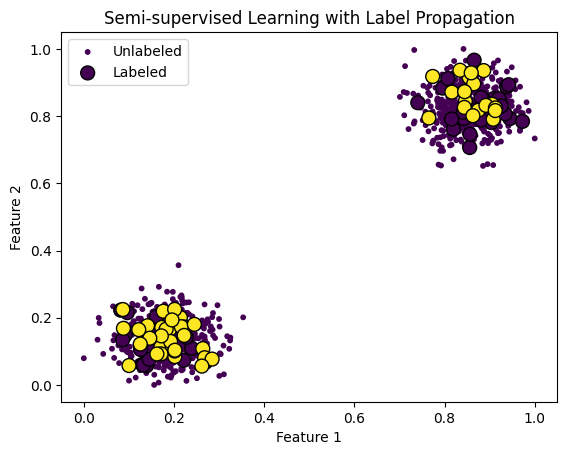

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Generate a synthetic dataset with clustering
np.random.seed(42)  # Set random seed for reproducibility
num_samples = 1000  # Total number of samples
num_classes = 2  # Binary classification
X_class0 = np.random.normal(loc=[20, 20], scale=5, size=(num_samples // 2, 2))  # Class 0 centered at [20, 20]
X_class1 = np.random.normal(loc=[80, 80], scale=5, size=(num_samples // 2, 2))  # Class 1 centered at [80, 80]
X = np.vstack((X_class0, X_class1))  # Combine the two classes
y = np.full(num_samples, -1)  # Initialize all labels as unlabeled (-1)

# Add more labeled samples with balanced classes
num_labeled = 100  # Increase the number of labeled samples
labeled_indices = np.random.choice(num_samples, num_labeled, replace=False)  # Select `num_labeled` samples
y[labeled_indices[: num_labeled // 2]] = 0  # Assign the first half to class 0
y[labeled_indices[num_labeled // 2 :]] = 1  # Assign the second half to class 1

# Normalize the dataset (important for distance-based kernels like RBF)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)  # Scale the features to the range [0, 1]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Label Propagation (semi-supervised learning)
model = LabelPropagation(kernel='rbf', gamma=50)  # Increase gamma for more localized influence
model.fit(X_train, y_train)  # Train the model

# Predict on the test set (excluding unlabeled data)
y_pred = model.predict(X_test[y_test != -1])  # Predict only for labeled test samples
y_test_filtered = y_test[y_test != -1]  # Filter out unlabeled test samples for evaluation

# Evaluate the model
accuracy = accuracy_score(y_test_filtered, y_pred)  # Compute accuracy
print(f"Accuracy: {accuracy:.2f}")  # Print accuracy score

# Visualize the labeled and unlabeled data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10, label='Unlabeled')  # Plot all data points
plt.scatter(X[labeled_indices, 0], X[labeled_indices, 1], c=y[labeled_indices], cmap='viridis',
            s=100, edgecolor='k', label='Labeled')  # Highlight labeled points
plt.xlabel('Feature 1')  # Label for x-axis
plt.ylabel('Feature 2')  # Label for y-axis
plt.title('Semi-supervised Learning with Label Propagation')  # Add a title
plt.legend()  # Add a legend
plt.show()  # Display the plot


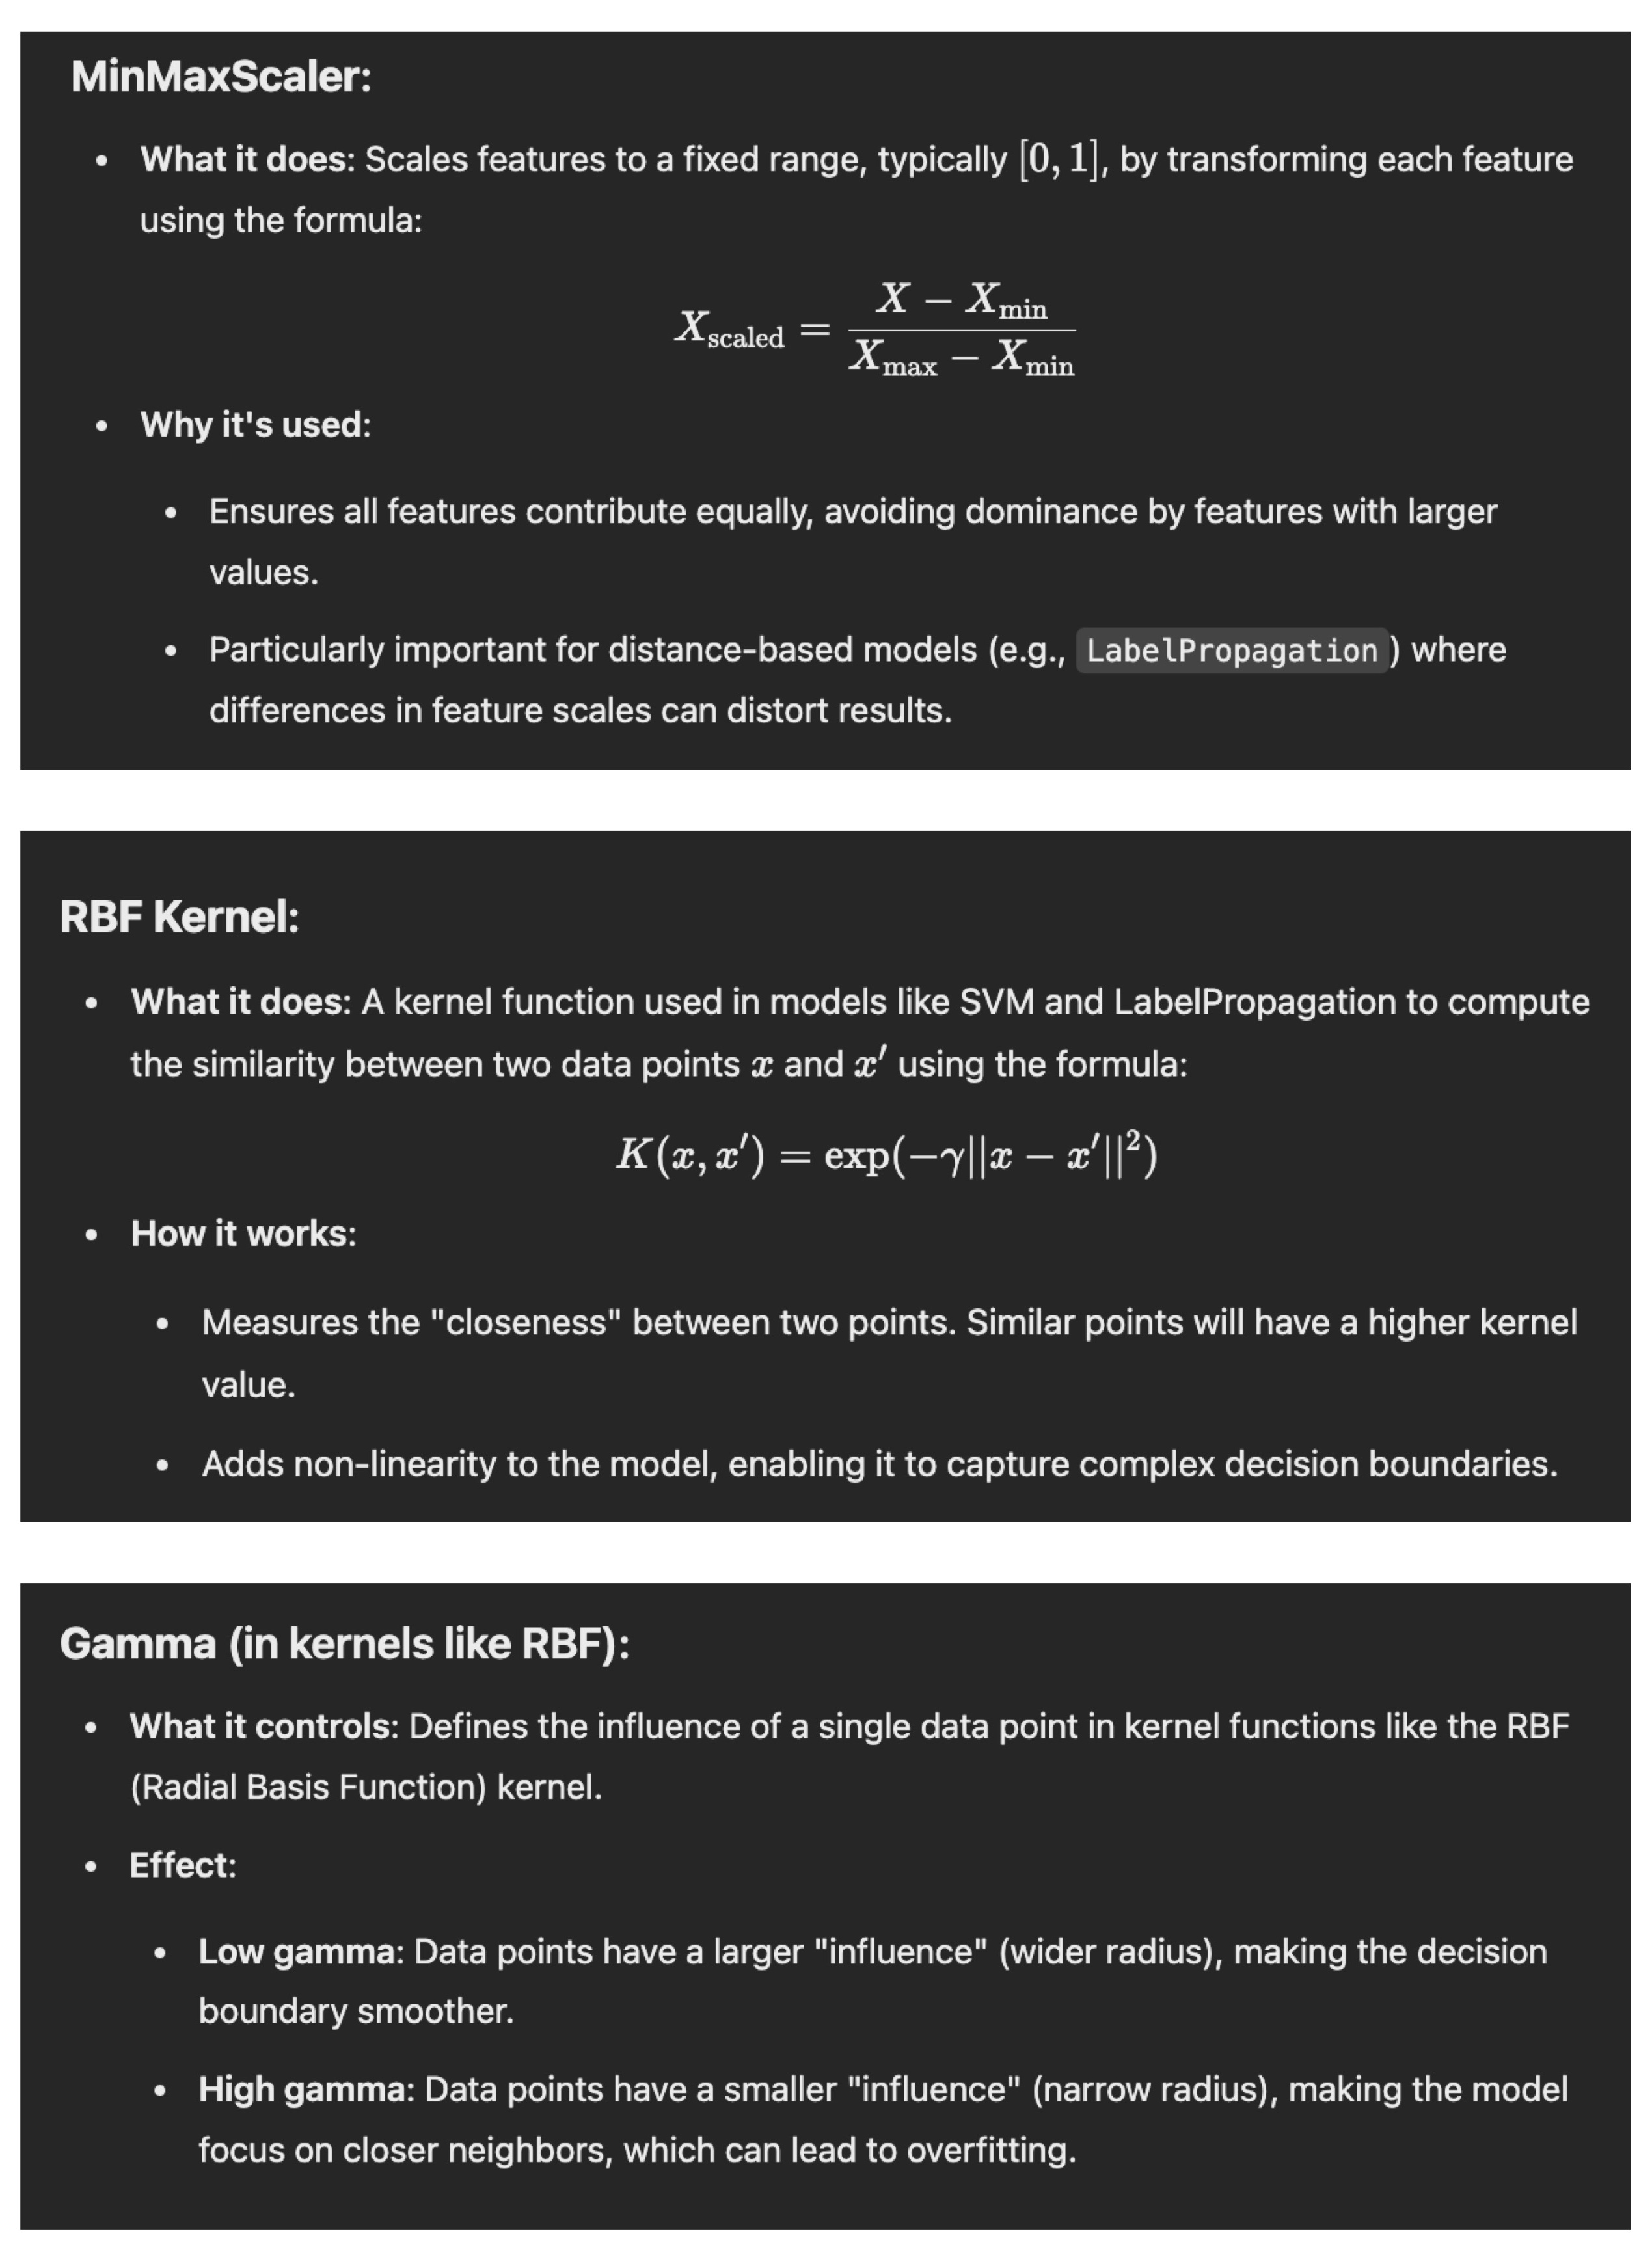

**Algorithms for Semi-supervised Learning**

1. Label Propagation: Assigns labels to unlabeled data based on label distribution among nearby samples in the feature space.

2. Self-training: A supervised model is trained on the labeled data and then used to label some of the unlabeled data. The newly labeled data is added to the training set iteratively.

3. Co-training: Uses multiple classifiers with different feature sets. Each classifier labels the unlabeled data, and the most confident predictions are used to update the other classifier.

4. Graph-based Methods: Models data as a graph where nodes represent data points and edges represent similarities. Labels are propagated through the graph structure.

**Applications**

1. Medical Imaging: Labeling only a few MRI or X-ray images to classify a much larger dataset of unlabeled medical scans.

2. Natural Language Processing: Training sentiment analysis models with a few labeled reviews and a large corpus of unlabeled text.

3. Speech Recognition: Using a small set of transcribed audio recordings to train models for recognizing large datasets of unlabeled speech.

4. Autonomous Vehicles: Labeling only a few frames from video data to detect objects in a continuous stream of unlabeled video.

**Challenges**

1. Label Bias: If the labeled data is not representative of the overall dataset, the model may learn biased patterns.

2. Reliance on Model Assumptions: Many semi-supervised methods rely on assumptions like "similar points have similar labels," which might not hold for all datasets.

3. Scalability: Some algorithms (e.g., graph-based methods) may struggle with very large datasets due to computational complexity.


## 3. Generative vs. Discriminative Models
- **Generative Models**:
  - Learn the joint probability distribution P(X, Y).
  - Example: Naive Bayes.
- **Discriminative Models**:
  - Focus on decision boundaries by learning P(Y|X).
  - Example: Logistic Regression.



# What are Generative and Discriminative Models

Understanding the distinction between **generative** and **discriminative** models is fundamental in machine learning. These two classes of models differ in how they approach the learning process and their goals.

## 1. Generative Models

### **Definition**
Generative models aim to learn the **joint probability distribution** \( P(X, Y) \), where:
- \( X \): Features (inputs) of the data.
- \( Y \): Labels (outputs or targets).

By modeling \( P(X, Y) \), generative models can:
1. Generate new samples that resemble the training data.
2. Infer the conditional probability \( P(Y|X) \) using Bayes' rule.

### Key Characteristics
- They describe how the data is generated.
- Can simulate or create data points similar to the training set.
- More computationally intensive compared to discriminative models.

### Examples



1. **Naive Bayes**:
   - Assumes that features are conditionally independent given the class label.
   - Often used for text classification and spam detection.
   
  

In [ ]:
# Example: Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes classifier for continuous data

# Features (X) and labels (Y)
X = [[1, 2], [2, 3], [3, 4], [4, 5]]  # Training data: feature values for each instance
Y = [0, 0, 1, 1]  # Class labels corresponding to the feature data

# Train the Naive Bayes model
model = GaussianNB()  # Initialize the Gaussian Naive Bayes model
model.fit(X, Y)  # Train the model using the features (X) and labels (Y)

# Make predictions
predictions = model.predict([[2, 3]])  # Predict the class for a new instance ([2, 3])
print(f"Predicted class: {predictions[0]}")  # Print the predicted class for the given instance


Predicted class: 0


**2. Hidden Markov Models (HMMs):**

Often used for sequence data, such as speech recognition or biological sequence analysis.

**3. Generative Adversarial Networks (GANs):**

Learn to generate realistic data (e.g., images, text, audio) by pitting two neural networks (generator and discriminator) against each other.

## 2. Discriminative Models

### Definition
Discriminative models focus on modeling the decision boundary between classes by learning P(Y|X) directly. Instead of modeling the joint distribution P(X, Y), these models optimize for classification or prediction tasks by directly mapping inputs \( X \) to outputs \( Y \).

### Key Characteristics
- **Direct Mapping**: These models estimate the relationship P(Y|X) directly, focusing solely on making accurate predictions.
- **Simpler Models**: Compared to generative models, discriminative models are simpler and often faster to train.
- **Better Classification Performance**: Typically achieve better results for classification and regression tasks due to their direct optimization approach.

### Examples

**1. Logistic Regression**

Logistic regression is a discriminative model used for binary classification. It predicts the probability of an outcome belonging to one of two classes based on input features.



In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression  # For training a Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report  # For evaluating the model (accuracy and detailed metrics)
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
import numpy as np  # For generating and manipulating numerical data

# Generate synthetic dataset
np.random.seed(42)  # Set a random seed for reproducibility
X = np.random.rand(100, 2) * 10  # Create 100 samples with 2 features, scaled to [0, 10]
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Binary labels: 1 if the sum of features > 10, otherwise 0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% testing split

# Train a Logistic Regression model
model = LogisticRegression()  # Initialize the Logistic Regression model
model.fit(X_train, y_train)  # Train the model using the training data

# Make predictions
y_pred = model.predict(X_test)  # Predict the labels for the testing set

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Compute the overall accuracy of the model
print(f"Accuracy: {accuracy:.2f}")  # Print the accuracy score
print("\nClassification Report:")  # Print a detailed classification report
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))  # Display precision, recall, F1-score, etc., for both classes


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      1.00      0.97        15
     Class 1       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**2. Support Vector Machines (SVMs)**

Support Vector Machines find the hyperplane that best separates data points into different classes. SVMs can handle linear and non-linear data using kernels.

**3. Neural Networks**

Neural networks, including deep learning models, learn highly complex decision boundaries and are widely used for tasks like image classification, NLP, and time-series forecasting.

**Applications**

- Classification Tasks: Spam detection, sentiment analysis, image classification.
- Regression Tasks: Predicting continuous outcomes like house prices or stock prices.
- Real-World Use Cases: Fraud detection, medical diagnosis, recommendation systems.


## 4. Machine Learning Workflow
A typical ML project follows these steps:
1. **Data Collection:** Gather data relevant to the problem.
2. **Preprocessing:** Clean and prepare the data.
3. **Model Training:** Use algorithms to find patterns in the data.
4. **Model Evaluation:** Assess performance on unseen data.
5. **Deployment:** Use the model in a real-world application.

Step 1: Data Collection
Dataset collected with features and labels.

Step 2: Data Preprocessing
Training set size: 400, Testing set size: 100
Data preprocessing completed.

Step 3: Model Training
Model training completed.

Step 4: Model Evaluation
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.97      1.00      0.98        57
     Class 1       1.00      0.95      0.98        43

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Step 5: Model Deployment
New Data Predictions: [1 0]
Model is ready for deployment in a real-world application.



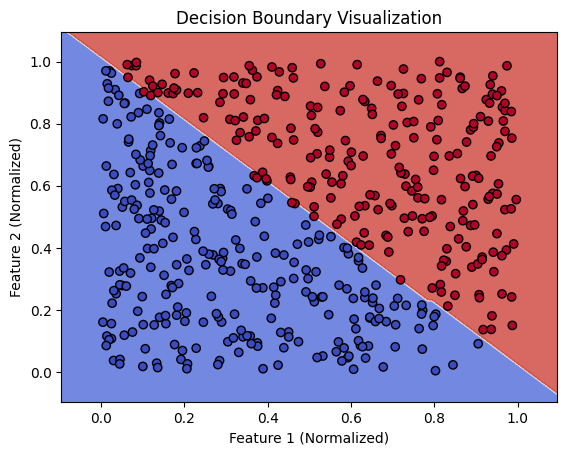

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Collection
# Generate synthetic dataset for demonstration purposes
print("Step 1: Data Collection")
np.random.seed(42)
num_samples = 500
X = np.random.rand(num_samples, 2) * 100  # Features: Two random variables
y = (X[:, 0] + X[:, 1] > 100).astype(int)  # Binary target based on a threshold
print("Dataset collected with features and labels.\n")

# Step 2: Preprocessing
print("Step 2: Data Preprocessing")
# Normalize the features for better performance (scaling between 0 and 1)
X_normalized = X / 100
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")
print("Data preprocessing completed.\n")

# Step 3: Model Training
print("Step 3: Model Training")
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
print("Model training completed.\n")

# Step 4: Model Evaluation
print("Step 4: Model Evaluation")
# Predict on the test data
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Step 5: Deployment Simulation
print("Step 5: Model Deployment")
# Simulate deployment by predicting on new, unseen data
new_data = np.array([[0.6, 0.7], [0.3, 0.2]])  # Two new data points
predictions = model.predict(new_data)
print("New Data Predictions:", predictions)
print("Model is ready for deployment in a real-world application.\n")

# Visualize the workflow
import matplotlib.pyplot as plt

# Plot the decision boundary
x_min, x_max = X_normalized[:, 0].min() - 0.1, X_normalized[:, 0].max() + 0.1
y_min, y_max = X_normalized[:, 1].min() - 0.1, X_normalized[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title('Decision Boundary Visualization')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.show()


## Code Explanation

#### **1. Data Collection**
- Synthetic data is generated using NumPy for demonstration purposes.
- Features are random values, and labels are created based on a threshold.

#### **2. Data Preprocessing**
- Features are normalized to scale values between 0 and 1, improving model performance.
- The dataset is split into **training** and **testing** sets to evaluate the model's generalization.

#### **3. Model Training**
- A **Logistic Regression** model is chosen as the classifier.
- The model is trained on the **training dataset** to learn the relationship between features and labels.

#### **4. Model Evaluation**
- The trained model makes predictions on the **test dataset**.
- Performance metrics such as:
  - **Accuracy**: Measures the overall correctness of predictions.
  - **Classification Report**: Provides precision, recall, F1-score, and support for each class.

#### **5. Model Deployment**
- The trained model is used to predict outcomes for **new, unseen data**.
- This simulates how the model would perform in a real-world application.

#### **6. Visualization**
- The **decision boundary** of the Logistic Regression model is plotted.
- This helps to intuitively understand how the model classifies data points.
